In [1]:
import pickle
import matplotlib.pylab as plt 
import numpy
import os

In [2]:
#read in the traces
with open('all_traces_BV0629','rb') as f:
    all_traces = pickle.load(f)
with open('Normolized_traces_BV0629','rb') as f:
    normalize_traces = pickle.load(f)

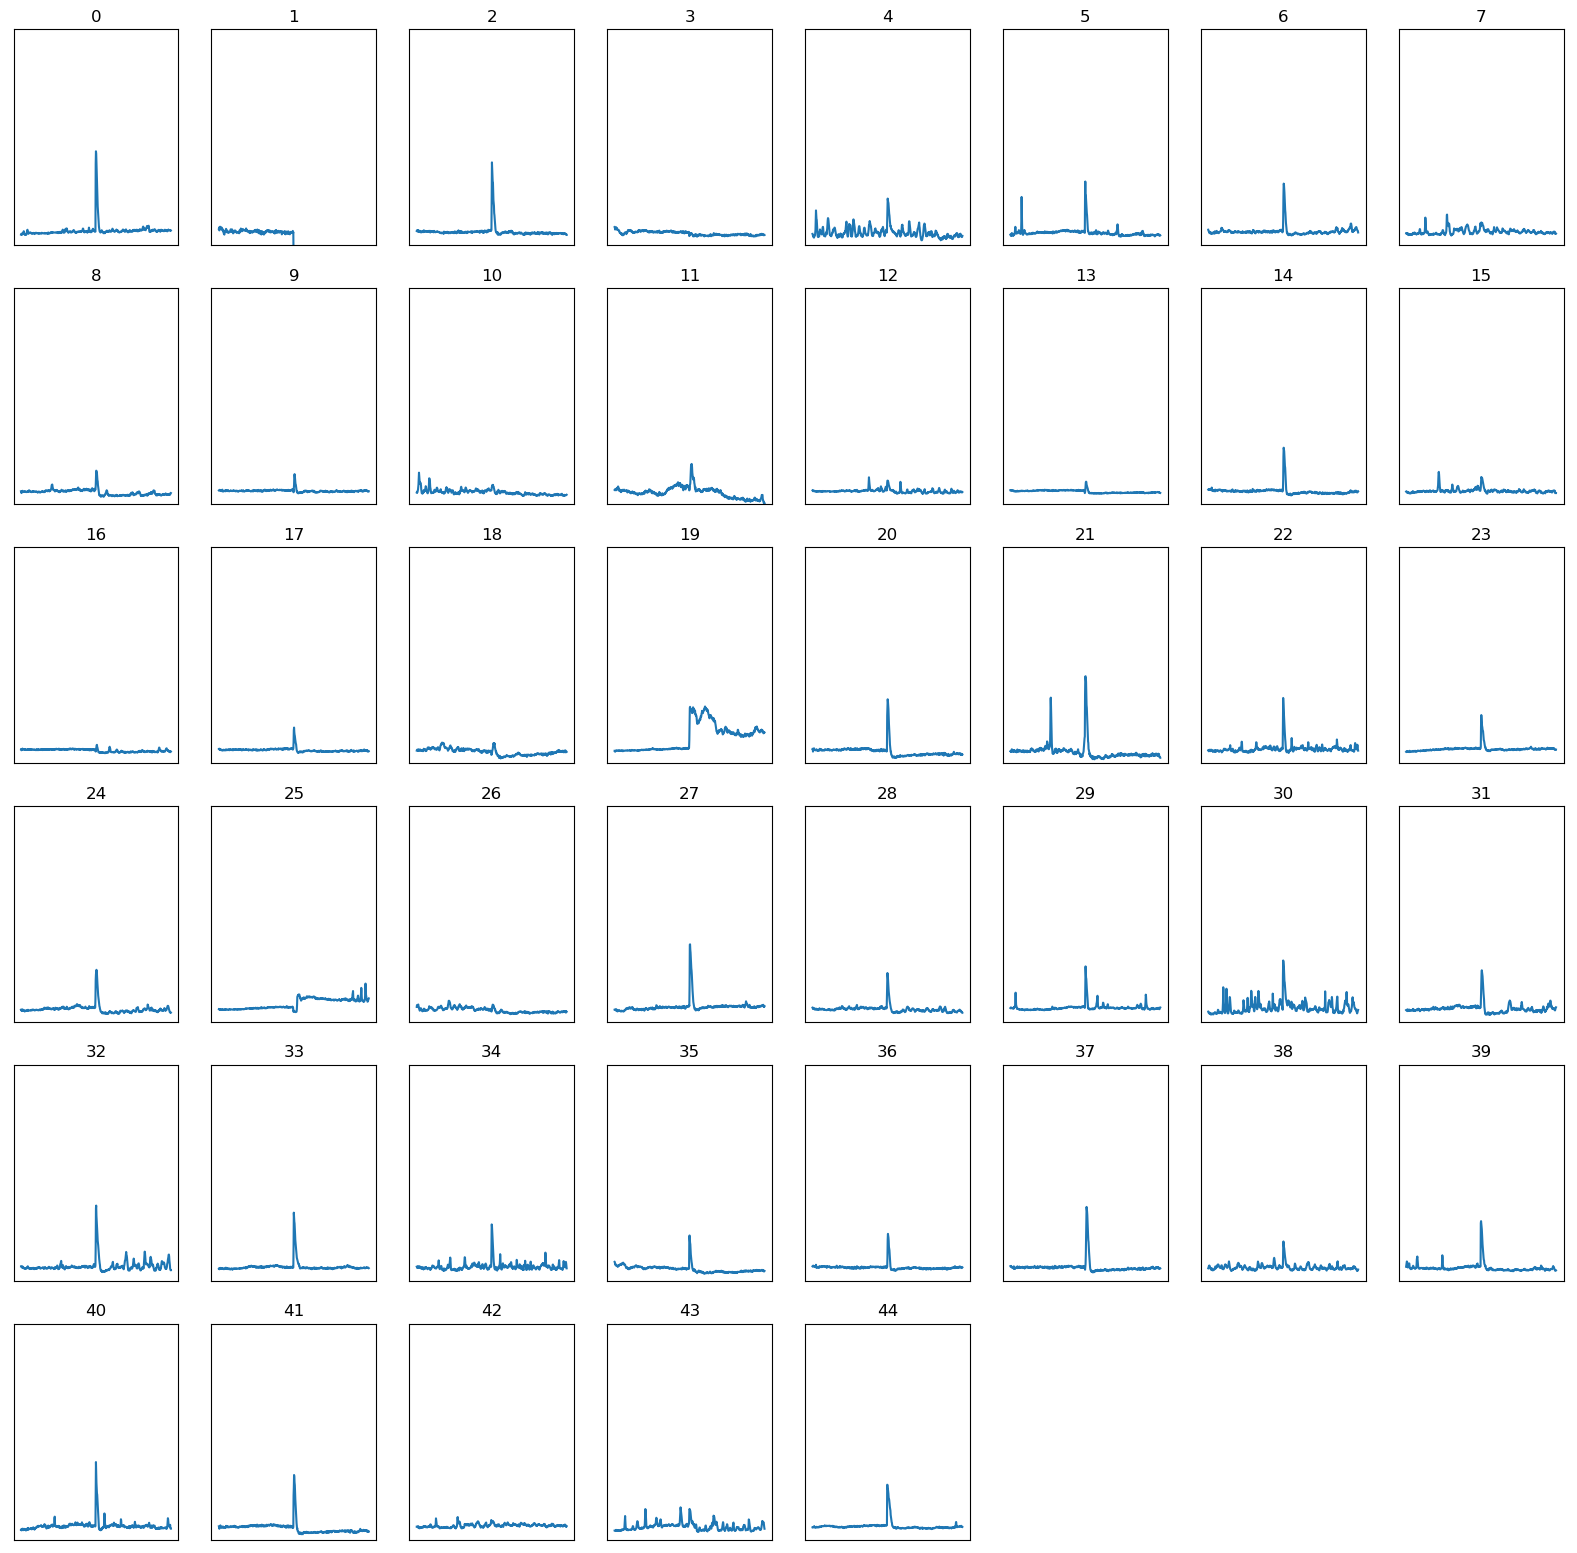

In [4]:
case=["0uM","50uM","100uM","500uM","1mM"]
plt.figure(figsize=(20,20),dpi=100)
for m,n in enumerate(normalize_traces["100uM"]):
    plt.subplot(6,8,m+1)
    plt.plot(n/10000)
    plt.title(str(m))
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-0.1,1.5])
    


()

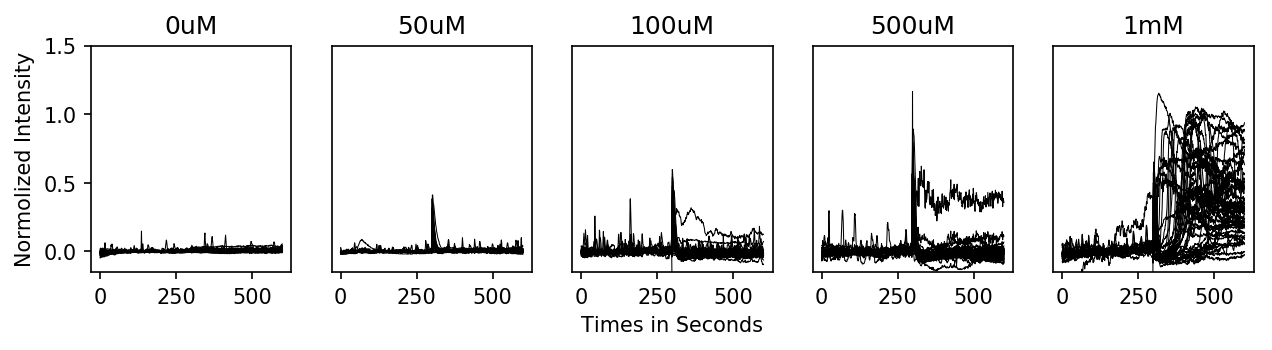

In [7]:
case=["0uM","50uM","100uM","500uM","1mM"]

plt.figure(figsize=(10,2),dpi=150)
for i,j in enumerate(case):
    plt.subplot(1,5,i+1)
        
    for  m,n in enumerate(normalize_traces[j]):
        plt.plot(n/10000,color='black',lw=0.5)

        plt.ylim([-0.15,1.5])
        if i == 0:
            plt.ylabel("Normolized Intensity")
        else:
            plt.yticks([])
        if i == 2:
            plt.xlabel('Times in Seconds')
        
        plt.title(j)

import numpy as np
np.shape(m)

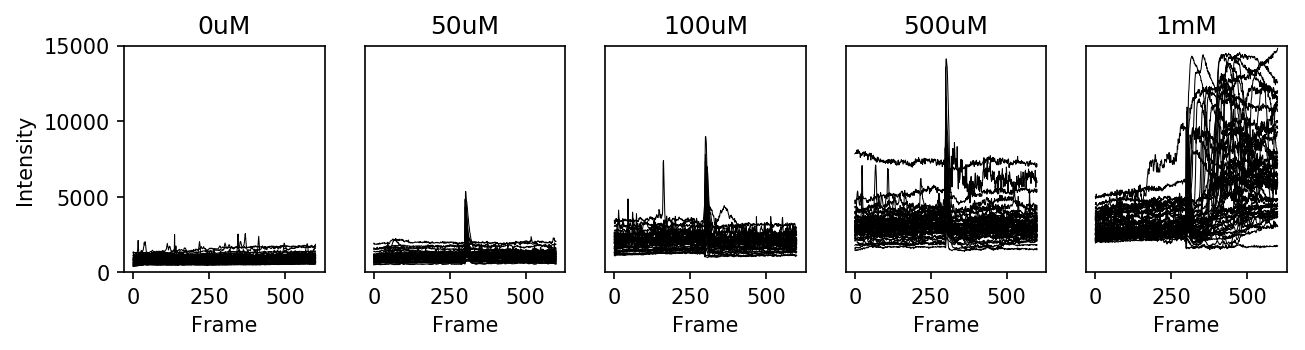

In [6]:
case=["0uM","50uM","100uM","500uM","1mM"]

plt.figure(figsize=(10,2),dpi=150)
for i,j in enumerate(case):
    plt.subplot(1,5,i+1)
    scale = 1e4
        
    for  m,n in enumerate(all_traces[j]):
        plt.plot(n[0],color='black',lw=0.5)

        plt.ylim(0,1.5)
        if i == 0:
            plt.ylabel("Intensity")
        else:
            plt.yticks([])
        plt.xlabel('Frame')
        plt.title(j)

In [5]:
import numpy as np

In [46]:
# calculate the average trace of each case and plot the std as shaded area
# first, for each case, stack the traces vertically, please search np.vstack to understand this step
stacked_traces = dict()
for i in case:
    temp = normolize_traces[i][0]
    for j in np.arange(1,len(normolize_traces[i])):
        temp = np.vstack((temp,normolize_traces[i][j]))
    stacked_traces[i] = temp
    

In [47]:
# get the mean and std for each case
meanTrace = dict()
std = dict()
for i in case:
    meanTrace[i] = np.mean(stacked_traces[i],axis=0)
    std[i] = np.std(stacked_traces[i],axis=0)
    
    

In [63]:
data1 = normalize_traces["0uM"][1]
data2 = normalize_traces["50uM"][19]
data3 = normalize_traces["100uM"][2]
data4 = normalize_traces["500uM"][31]
data5 = normalize_traces["1mM"][28]
data = [data1, data2, data3, data4, data5]

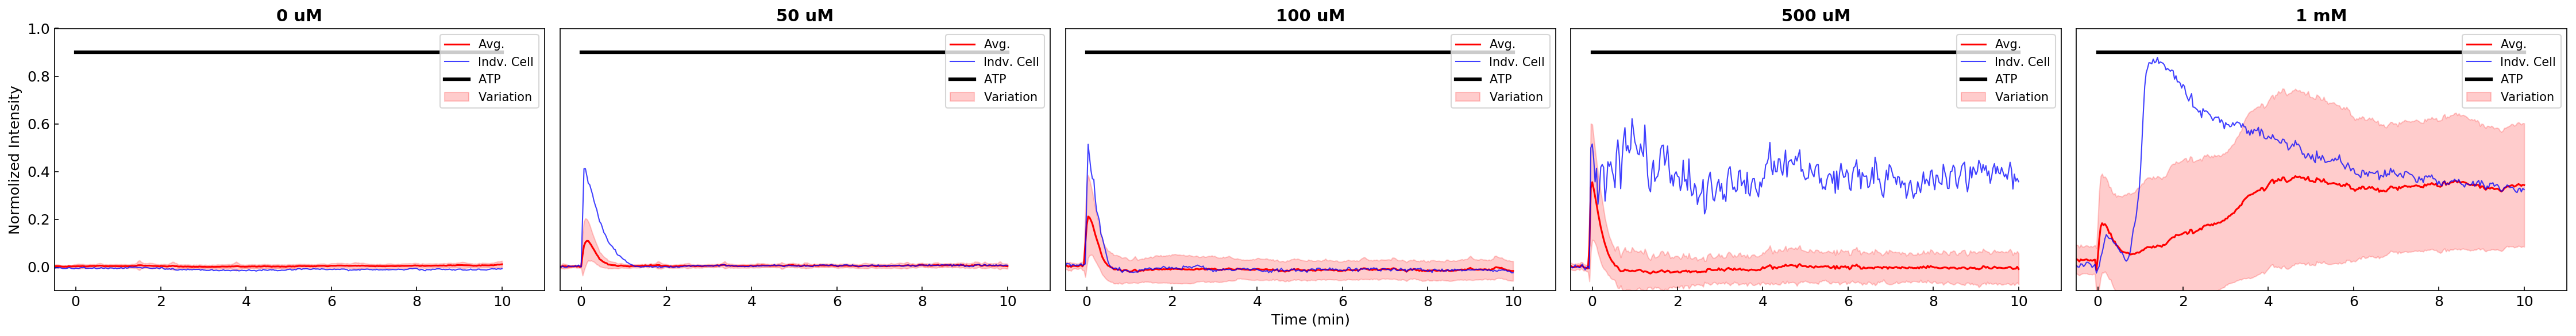

In [96]:
plt.figure(figsize=(30,4),dpi=150)
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
for i,j in enumerate(case):
    plt.subplot(1,5,i+1)
    plt.tick_params(labelsize=12,direction='in')
    x = np.arange(len(meanTrace[j]))
    y = meanTrace[j]/10000
    plt.plot(x*2/60-10,y,'r-',lw=1.5,label='Avg.')
    plt.plot(x*2/60-10,data[i]/10000,'b-',lw=1,alpha=0.75,label='Indv. Cell')
    plt.fill_between(x*2/60-10, y-std[j]/10000, y+std[j]/10000,alpha=0.2, edgecolor='red', facecolor='red', label='Variation')
    plt.ylim([-0.1,1])
    plt.xlim([-0.5,11])
    plt.plot([0,10],[0.9,0.9],'k-',lw=3,label='ATP')
    if i == 0:
        plt.ylabel("Normolized Intensity",fontsize=12)
    else:
        plt.yticks([])
        
    if i == 2:
        plt.xlabel('Time (min)',fontsize=12)
    plt.legend(loc=1,fontsize=10)
    plt.title(Case[i],fontsize=14,fontweight='bold')
    plt.tight_layout()